In [2]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.image as mpimg
import glob
from data_utils import load_data, augment_data,normalise_train,normalise_test,rgb2gray
import matplotlib.pyplot as plt
from tucha import complex_pokemon_model,baselinish


In [ ]:
X_train,X_test,Y_train, Y_test = load_data()
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

0


In [ ]:
X_train,mean_image,std_image = normalise_train(X_train)
plt.imshow(mean_image.astype('uint8'))
plt.show()
X_test = normalise_test(X_test,mean_image,std_image)
print(test_data.shape)
print (train_data.shape)

In [11]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 64, 64,1])
Y = tf.placeholder(tf.float32 ,[None , 64,64,3])
is_training = tf.placeholder(tf.bool)

with tf.variable_scope("model") as scope:
    y_out = complex_pokemon_model(X,is_training)
    loss = tf.sqrt(tf.nn.l2_loss(y_out-Y))
    optimiser = tf.train.AdamOptimizer(1e-3)
    train_step = optimiser.minimize(loss)

    scope.reuse_variables()
    test_model = complex_pokemon_model(X,is_training)
    loss_test = tf.sqrt(tf.nn.l2_loss(test_model - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 32
def train_epoch(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y: -1 + (target[i*batch_size:batch_size*i+batch_size])/255.0, X: data[i*batch_size:batch_size*i+batch_size],is_training:True}
        losses,_ = sess.run([loss,train_step],feed_dict)
        if(i%5==0):
            print (losses)

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y: -1.0 + (target[i*batch_size:batch_size*i+batch_size])/255.0, X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 2
for i in range(num_epochs):
    train_epoch(X_train, Y_train)
    val_result(X_test, Y_test)

    



3.11436e+09
8.53017e+08
4.20555e+08
3.62706e+08
3.05249e+08
3.15915e+08
2.32528e+08
3.86798e+08
2.72259e+08
2.19203e+08
3.26696e+08
2.43652e+08
1.70487e+08
2.21264e+09
9.32889e+08
6.44976e+08
3.43498e+08
3.82208e+08
5.84535e+08
4.65194e+08
2.42241e+08
2.81215e+08
3.12711e+08
1.07634e+09
8.40695e+08
3.66514e+08
2.97062e+08
3.07445e+08
2.42532e+08
2.1803e+08
1.97032e+08
1.92416e+08
1.7182e+08
1.36665e+08
2.23089e+08
2.45123e+08
6.01583e+08
6.76351e+08
8.45727e+08
4.71946e+08
3.90021e+08
3.38588e+08
3.86434e+08
4.10379e+08
5.85703e+08
6.93059e+08
6.12982e+08
4.26819e+08
2.00008e+08
2.29568e+08
2.39413e+08
1.74989e+08
2.20279e+08
2.18103e+08
2.02166e+08
1.47609e+08
1.69689e+08
1.56813e+08
1.79564e+08
4.74043e+08
3.70233e+08
2.49138e+08
3.1971e+08
3.34966e+08
4.20724e+08
2.21508e+08
3.89967e+08
3.49688e+08
2.74417e+08
1.93068e+08
2.64812e+08
4.99148e+08
5.12295e+08
3.54378e+08
3.52475e+08
3.16185e+08
2.77552e+08
1.67091e+08
3.28856e+08
4.37419e+08
1.00168e+08
4.10581e+08
3.94185e+08
3.60486

(10, 64, 64, 3)
(10, 64, 64)
3.06586e+07
(10, 64, 64, 3)


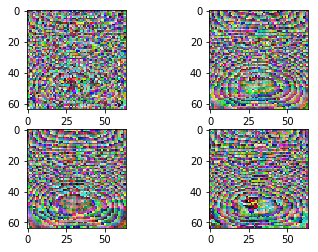

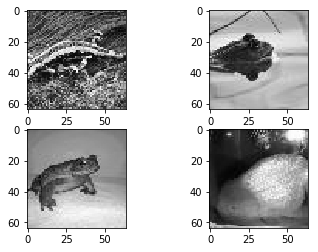

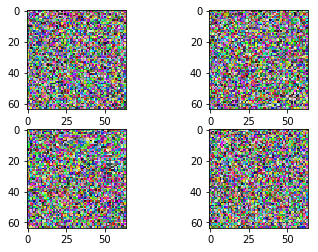

In [13]:
### Image visualisation
import matplotlib.pyplot as plt
import numpy.random as rnd

def rgb2gray2(rgb):
    a = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    return a

rand_indices = np.random.choice(2000,10)
sample_images = X_small_train[rand_indices]
print (sample_images.shape)
grayed_sample_images = rgb2gray2(sample_images)
print (grayed_sample_images.shape)

feed_dict = {X:grayed_sample_images[:,:,:,np.newaxis],Y:sample_images,is_training:True}
model_generated_images = sess.run([test_model,loss_test],feed_dict)
print (model_generated_images[1])
print(model_generated_images[0].shape)

def show_images(images,gray = False):

    
    if(gray):
        plt.subplot(221)
        plt.imshow(images[0],cmap = plt.get_cmap('gray'))
        plt.subplot(222)
        plt.imshow(images[1], cmap = plt.get_cmap('gray'))
        plt.subplot(223)
        plt.imshow(images[2], cmap = plt.get_cmap('gray'))
        plt.subplot(224)
        plt.imshow(images[3], cmap = plt.get_cmap('gray'))
    else :
        plt.subplot(221)
        plt.imshow(images[0]);
        plt.subplot(222)
        plt.imshow(images[1])
        plt.subplot(223)
        plt.imshow(images[2])
        plt.subplot(224)
        plt.imshow(images[3])

    plt.show()
    
    
show_images((sample_images))
show_images(grayed_sample_images,gray = True)
show_images(model_generated_images[0] )

    

In [2]:
import tensorflow.contrib.slim as slim

In [3]:
def lrelu(x, leak=0.2, name='lrelu'):
   return tf.maximum(leak*x, x)

def architecture(gray_image, train=True):
   conv1 = lrelu(slim.convolution(gray_image, 32, 3, stride=1, scope='conv1', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv2 = lrelu(slim.convolution(conv1, 32, 3, stride=1, scope='conv2', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv3 = lrelu(slim.convolution(conv2, 64, 3, stride=1, scope='conv3', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv4 = lrelu(slim.convolution(conv3, 64, 3, stride=1, scope='conv4', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv5 = lrelu(slim.convolution(conv4, 128, 3, stride=1, scope='conv5', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv6 = lrelu(slim.convolution(conv5, 128, 3, stride=1, scope='conv6', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv7 = lrelu(slim.convolution(conv6, 256, 3, stride=1, scope='conv7', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv8 = lrelu(slim.convolution(conv7, 256, 3, stride=1, scope='conv8', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv9 = lrelu(slim.convolution(conv8, 128, 3, stride=1, scope='conv9', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv10 = lrelu(slim.convolution(conv9, 128, 3, stride=1, scope='conv10', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv11 = lrelu(slim.convolution(conv10, 64, 1, stride=1, scope='conv11', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv12 = lrelu(slim.convolution(conv11, 64, 1, stride=1, scope='conv12', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv13 = lrelu(slim.convolution(conv12, 32, 1, stride=1, scope='conv13', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv14 = lrelu(slim.convolution(conv13, 32, 1, stride=1, scope='conv14', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv15 = lrelu(slim.convolution(conv14, 16, 1, stride=1, scope='conv15', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv16 = lrelu(slim.convolution(conv15, 16, 1, stride=1, scope='conv16', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   conv17 = lrelu(slim.convolution(conv16, 8, 1, stride=1, scope='conv17', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   if train: conv17 = tf.nn.dropout(conv17, 0.8)
   conv18 = lrelu(slim.convolution(conv17, 3, 1, stride=1, scope='conv18', normalizer_fn=slim.batch_norm, activation_fn=tf.identity))
   if train: conv18 = tf.nn.dropout(conv18, 0.8)
   
   tf.add_to_collection('vars', conv1)
   tf.add_to_collection('vars', conv2)
   tf.add_to_collection('vars', conv3)
   tf.add_to_collection('vars', conv4)
   tf.add_to_collection('vars', conv5)
   tf.add_to_collection('vars', conv6)
   tf.add_to_collection('vars', conv7)
   tf.add_to_collection('vars', conv8)
   tf.add_to_collection('vars', conv9)
   tf.add_to_collection('vars', conv10)
   tf.add_to_collection('vars', conv11)
   tf.add_to_collection('vars', conv12)
   tf.add_to_collection('vars', conv13)
   tf.add_to_collection('vars', conv14)
   tf.add_to_collection('vars', conv15)
   tf.add_to_collection('vars', conv16)
   tf.add_to_collection('vars', conv17)
   tf.add_to_collection('vars', conv18)
   
   return conv18

In [9]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 64, 64,1])
Y = tf.placeholder(tf.float32 ,[None , 64,64,3])
is_training = True;
y_out = architecture(X)
loss = tf.nn.l2_loss(y_out - Y)
optimiser = tf.train.AdamOptimizer(0.1)
train_step = optimiser.minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())


for i in range(100):
    
	feed_dict = {Y: image_data[i*100:100*i+100], X: rgb2gray(image_data[i*100:i*100+100])}
	losses,_ = sess.run([loss,train_step],feed_dict)
	if(i%5 ==0):
		print (losses)

8.97004e+09
8.66827e+09
7.58429e+09


KeyboardInterrupt: 

In [10]:
from extract_grayscale import load_data
data = load_data()


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
